In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


**Baseline Model**

In [2]:
#loading data and spliting for training and testing
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

6407
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31  52 114 100  25  52 143 176 154 105  34   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5   0  56 209 216 224 225 231 255 255 236 206 210 229 101   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   8   0 129 238 187 194 192 171 152 140 191 201 203 210 221 175]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0 151 209 187 188

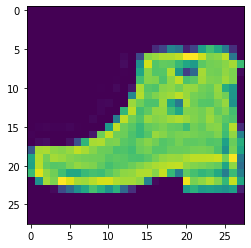

In [25]:
rand_img = np.random.randint(len(training_images), size=1)[0]
print(rand_img)
np.set_printoptions(linewidth=200)
plt.imshow(training_images[rand_img])
print(training_labels[rand_img])
print(training_images[rand_img])

In [27]:
training_images.max()

255

In [29]:
#normalizing values with 255
training_images  = training_images / training_images.max()
test_images = test_images / training_images.max()

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #defines a sequence of layers in the neural network; faltten is to turn the square img into 1 dimension set
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), #dense:adds a layer of neurons, for this layer we will be using ReLua as the activation function
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) #softmax takes a set of values and effeitively picks the biggest one; the goal is to save a lot of coding

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8266
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.8928


In [30]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 61.9781 - accuracy: 0.8502


[61.97808074951172, 0.8501999974250793]

# Exploration Exercises

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [32]:
classifications = model.predict(test_images)

print(classifications[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


The 10 numbers represent the probablity the outcome being one of the 10 classes.

### How do you know that this list tells you that the item is an ankle boot?
The 10th element on the list is the biggest, and the ankle boot is labelled 9

# Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [34]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), #changing the neuron nums to 1024
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1863
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0751
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0473
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0347
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0807
[1.3126445e-08 2.0558529e-07 1.0343218e-07 5.9870379e-03 7.3449103e-12 6.5794666e-08 3.1276984e-12 9.9401063e-01 1.8785773e-08 1.8778555e-06]
7


###Question 1. Increase to 1024 Neurons -- What's the impact?
Training takes longer, but is more accurate

# Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [35]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5


ValueError: ignored

# Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [36]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)]) #changed to 5, however, we need to set it to 10 because we have 10 classes to predict

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5


InvalidArgumentError: ignored

# Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [37]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1857
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0806
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0555
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0407
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0823
[2.2914275e-08 5.2968727e-07 3.1341881e-06 1.9057334e-06 4.3663331e-08 1.2984958e-08 1.4525926e-10 9.9998772e-01 2.9642925e-08 6.5293257e-06]
7


# Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [38]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.2.0
Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1109
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0751
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0572
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0430
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0223
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0150
Epoch 11/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0128
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.

# Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [39]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#training_images=training_images/255.0
#test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.5030
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3292
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3048
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2628
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3537
[0.0000000e+00 1.4134710e-19 5.6953053e-17 1.5176239e-13 1.5370855e-26 2.4715579e-33 0.0000000e+00 1.0000000e+00 2.0038419e-27 7.1471310e-19]
7


# Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [40]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.2.0
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4758
Epoch 2/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.3580
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3579
